# Facebook Software Engineer Job Openings Analysis
Analytical objects: all jobs related to the keyword `software`.

Web Scraper: https://github.com/a19990506/Hello-World/blob/master/project/FaceBook_webCrawler.ipynb

In [75]:
%matplotlib inline

import sys
sys.path.insert(0, '../modules/')
from fintextmin import *
import nltk
nltk.download('punkt')

import pandas
import matplotlib
import numpy as np
from collections import OrderedDict
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

df = pandas.read_csv('facebook_jobs.csv')
df.head(10)

[nltk_data] Downloading package punkt to /home/aesophor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,title,location,minimum_qual,preferred_qual,responsibilities
0,Software Engineer,"Pittsburgh, PA",Masters degree or doctorate in fields related ...,NaN,Bachelors degree in fields related to computer...
1,Software Engineer - Depth Sensing,"Menlo Park, CA",Experience with OS internals and kernel develo...,NaN,"Bachelor’s degree in Computer Science, Electri..."
2,Software Engineer Prototype,"Menlo Park, CA",Bachelor’s degree in Computer Science or a rel...,Masters or Ph.D. in Computer Science or a rela...,"Develop high quality, robust, and reusable, C+..."
3,Software Developer,"Redmond, WA",Experience with analysis of large data sets,NaN,BS in Computer Science or a related technical ...
4,"Software Engineer, Facebook Connectivity","Menlo Park, CA","Knowledge of C, C++, and Nix systems.\nB.S. or...",Bachelors or Masters Degree in CS or EE plus a...,Drafting software that runs on embedded boards...
5,FRL Tracking Software Engineer,"Redmond, WA",Experience with sensor fusion\nExperience with...,NaN,"BS degree in Computer Science, Computer Vision..."
6,"Software Engineer, Mobile Core Engineering","Dallas, TX",Android OS experience.\nVirtual reality experi...,NaN,3+ years of C and C++ programming experience.\...
7,Software Engineer,"Menlo Park, CA",Experience with C/C++ and Python. :Experience ...,"Bachelor’s degree, BSEE or BS Computer Enginee...",Develop software solutions to perform calibrat...
8,User Interaction Platform Software Engineer,"Redmond, WA",Probability mathematics and software modeling ...,NaN,"BS degree in Computer Science, Math, Physics o..."
9,"Software Engineer, Source Control","London, United Kingdom",B.S. or M.S. in Computer Science or related fi...,Experience with Rust\nExperience working on di...,Proactively develop server-side source control...


In [15]:
def count_keywords_freq(df: pandas.DataFrame, col_name: str, keywords: list, none=False):
    """ Given a list of keywords and count their frequency in
    the specified pandas dataframe.
    :param d: target pandas dataframe.
    :param col_name: target column name.
    :param keywords: a list of keywords.
    :param none: count the items that contain no specified keywords at all.
    :return: keyword frequency dict.
    """
    freq = {keyword: 0 for keyword in keywords}
    
    for keyword in keywords:
        freq[keyword] = df[col_name].str.contains(keyword, regex=False).sum()
    
    if none is True:
        freq['None'] = 0
        for col in df[col_name]:
            freq['None'] += 0 if type(col) is str and any(w in col for w in keywords) else 1
                    
    return freq

In [16]:
keywords = ['PhD', 'Master', 'MBA', 'BA', 'BS', 'Bachelor']

# Count keyword frequency.
min_degree_reqs = count_keywords_freq(df, 'minimum_qual', keywords, none=True)
pref_degree_reqs = count_keywords_freq(df, 'preferred_qual', keywords, none=False)

print("Minimum: " + str(min_degree_reqs))
print("Preferred: " + str(pref_degree_reqs))

Minimum: {'PhD': 86, 'Master': 34, 'MBA': 14, 'BA': 147, 'BS': 255, 'Bachelor': 153, 'None': 565}
Preferred: {'PhD': 31, 'Master': 15, 'MBA': 27, 'BA': 43, 'BS': 44, 'Bachelor': 36}


In [17]:
min_degree_df = pandas.DataFrame.from_dict(min_degree_reqs, orient='index', columns=['Count'])
pref_degree_df = pandas.DataFrame.from_dict(pref_degree_reqs, orient='index', columns=['Count'])

min_degree_df

,Count
PhD,86
Master,34
MBA,14
BA,147
BS,255
Bachelor,153
None,565


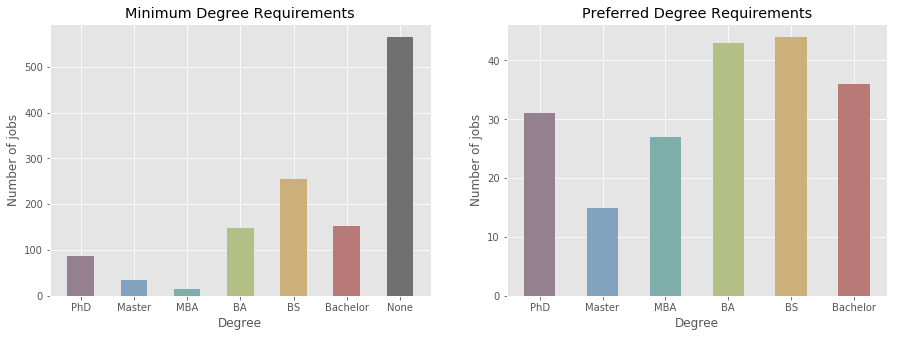

In [84]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']

min_labels = list(min_degree_reqs.keys())
min_values = list(min_degree_reqs.values())

pref_labels = list(pref_degree_reqs.keys())
pref_values = list(pref_degree_reqs.values())


plt.figure(figsize=(15, 5))

# In this plot, there will be 1 row, 2 columns.
plt.subplot(1, 2, 1) # Drawing the 1st subplot.
plt.bar(min_labels, min_values, color=colors, width=0.5)
plt.xlabel('Degree')
plt.ylabel('Number of jobs')
plt.title('Minimum Degree Requirements')

plt.subplot(1, 2, 2) # Drawing the 2nd subplot.
plt.bar(pref_labels, pref_values, color=colors, width=0.5)
plt.xlabel('Degree')
plt.ylabel('Number of jobs')
plt.title('Preferred Degree Requirements')

plt.savefig('out_graphs/facebook_degree_requirements.png', format='png')
plt.show()

In [20]:
def extract_experience(df: pandas.DataFrame, col_name: str, start_year=0, end_year=20):
    """ Extract years of experiences required
    :param df: target dataframe.
    :param col_name: name of the column that contains strings
                     like `4 years of experience in ...`
    :param start_year: the starting year in the list returned.
    :param end_year: the last year in the list returned.
    :return: a list of years of exp required (index by years)
    """
    import re
    
    exp_list = [0] * 21
    
    for col in df[col_name]:
        try:
            exp_required = re.findall('\d+ year', col)
            exp_required =exp_required+ re.findall('\d+\+ year', col)
            year = 0 if not exp_required else int(exp_required[0].replace(' year', '').replace('+', ''))
            exp_list[year] += 1
        except:
            continue
        
    return exp_list

In [21]:
min_exp_list = extract_experience(df, 'minimum_qual')
pref_exp_list = extract_experience(df, 'preferred_qual')

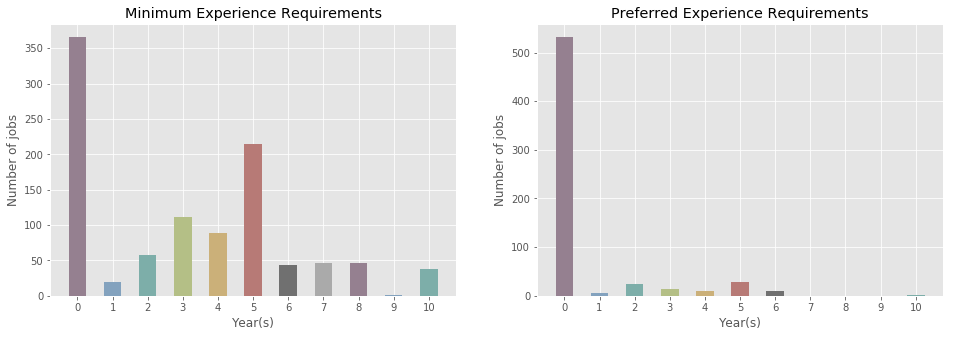

In [85]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']
labels = np.arange(len(min_exp_list))

plt.figure(figsize=(16, 5))

# In this plot, there will be 1 row, 2 columns.
plt.subplot(1, 2, 1) # Drawing the 1st subplot.
plt.bar(np.arange(11), min_exp_list[0:11], color=colors, width=0.5)
plt.xticks(labels[0:11])
plt.xlabel('Year(s)')
plt.ylabel('Number of jobs')
plt.title('Minimum Experience Requirements')

plt.subplot(1, 2, 2) # Drawing the 2nd subplot.
plt.bar(labels[0:11], pref_exp_list[0:11], color=colors, width=0.5)
plt.xticks(labels[0:11])
plt.xlabel('Year(s)')
plt.ylabel('Number of jobs')
plt.title('Preferred Experience Requirements')

plt.savefig('out_graphs/facebook_exp_requirements.png', format='png')
plt.show()

In [23]:
jobs_freq = {}

for col in df['title']:
    if type(col) is not str:
        continue
    col = col.split(',')[0]
    if col in jobs_freq:
        jobs_freq[col] += 1
    else:
        jobs_freq[col] = 1
        
jobs_freq = dict(sorted(jobs_freq.items(), key=lambda kv: kv[1], reverse=True))

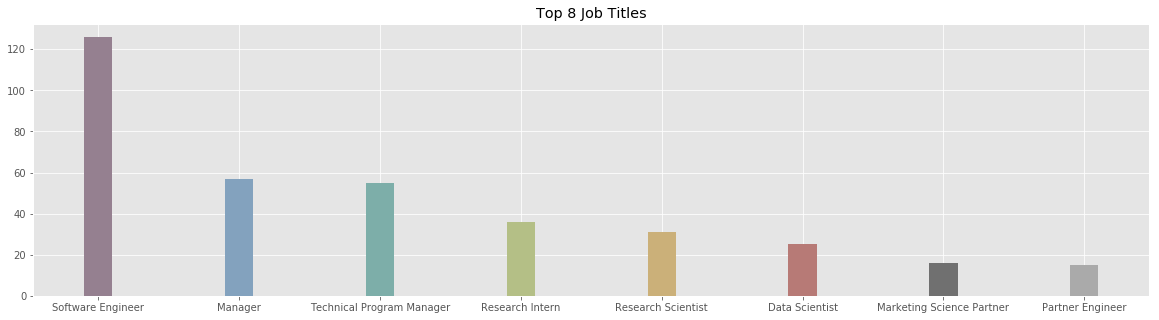

In [86]:
colors = ['#958090', '#83A2BE', '#7DAEA9', '#B4BF86', '#CBB079', '#B77A76', '#707070', '#AAAAAA']

min_labels = list(jobs_freq.keys())[0:8]
min_values = list(jobs_freq.values())[0:8]

plt.figure(figsize=(20, 5))
plt.bar(min_labels, min_values, color=colors, width=0.2)
plt.title('Top 8 Job Titles')

plt.savefig('out_graphs/facebook_top_job_titles.png', format='png')
plt.show()

In [30]:
lang_colors = {
    'C++': '#F34B7D',
    'Java': '#B07219',
    'Python': '#3572A5',
    'JavaScript': '#F1E05A',
    'Go': '#375EAB',
    'PHP': '#4F5D95',
    'SQL': '#494D5C',
    'Ruby': '#701516',
    'Swift': '#FFAC45',
    'Kotlin': '#F18E33',
    'C#': '#178600',
    'Objective C': '#438EFF'
}

In [31]:
langs = lang_colors.keys()

# Count keyword frequency.
min_lang_reqs = count_keywords_freq(df, 'minimum_qual', langs)
pref_lang_reqs = count_keywords_freq(df, 'preferred_qual', langs)

# Sort the dicts.
min_lang_reqs = dict(sorted(min_lang_reqs.items(), key=lambda kv: kv[1], reverse=True))
pref_lang_reqs = dict(sorted(pref_lang_reqs.items(), key=lambda kv: kv[1], reverse=True))

# Create DataFrame from dict.
min_lang_df = pandas.DataFrame.from_dict(min_lang_reqs, orient='index', columns=['Count'])
pref_lang_df = pandas.DataFrame.from_dict(pref_lang_reqs, orient='index', columns=['Count'])

min_lang_reqs

{'C++': 278,
 'Python': 244,
 'Java': 242,
 'PHP': 188,
 'SQL': 144,
 'JavaScript': 60,
 'C#': 44,
 'Ruby': 34,
 'Go': 20,
 'Swift': 4,
 'Objective C': 3,
 'Kotlin': 0}

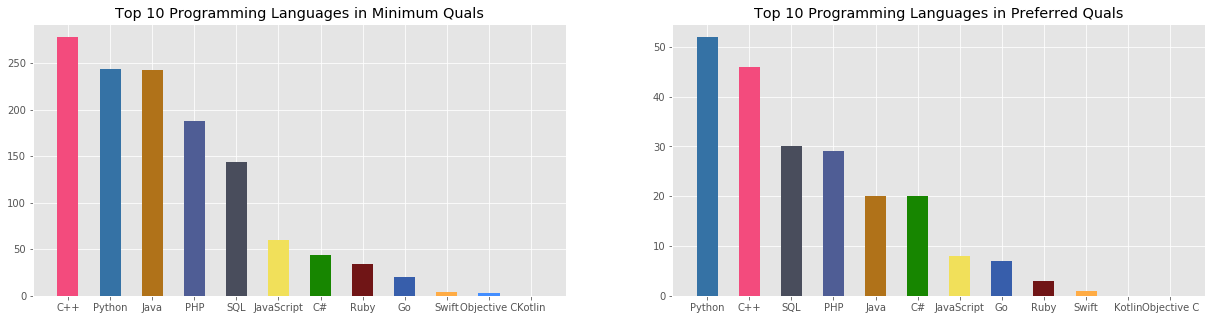

In [87]:
min_labels = list(min_lang_reqs.keys())
min_values = list(min_lang_reqs.values())
min_colors = [lang_colors[k] for k, v in min_lang_reqs.items()]

pref_labels = list(pref_lang_reqs.keys())
pref_values = list(pref_lang_reqs.values())
pref_colors = [lang_colors[k] for k, v in pref_lang_reqs.items()]


plt.figure(figsize=(21, 5))

# In this plot, there will be 1 row, 2 columns.
plt.subplot(1, 2, 1) # Drawing the 1st subplot.
plt.bar(min_labels, min_values, color=min_colors, width=0.5)
plt.title('Top 10 Programming Languages in Minimum Quals')

plt.subplot(1, 2, 2) # Drawing the 2nd subplot.
plt.bar(pref_labels, pref_values, color=pref_colors, width=0.5)
plt.title('Top 10 Programming Languages in Preferred Quals')

plt.savefig('out_graphs/facebook_top_prog_langs.png', format='png')
plt.show()

In [35]:
def import_terms(tokenizer: nltk.tokenize.MWETokenizer, term_file_path: str):
    """ Import all user-defined untokenizable terms from a file into nltk MWETokenizer.
    :param tokenizer: nltk MWETokenizer instance.
    :param text_file_path: path to the file.
    """
    with open(term_file_path, 'r') as f:
        for line in f:
            tokenizer.add_mwe(line.strip().split())

In [36]:
def tokenize(tokenizer: nltk.tokenize.MWETokenizer, s: str, lowercase=True, preserve_case_words=[]):
    """ Tokenize given string using nltk MWETokenizer.
    :param case: convert all tokens into lowercase.
    :param exclude_words: words that should preserve their cases.
    :return: a list of tokens.
    """
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = tokenizer.tokenize(tokens)
    
    # Remove tokens that are either purely digits or purely punctuations.
    tokens = list(filter(lambda token: not token.isdigit() and re.search('[a-zA-Z]', token), tokens))

    # Since nltk MWETokenizer will not split tokens that contain a slash,
    # we'll have to do it ourselves.
    for token in tokens:
        if '/' in token:
            tokens += token.split('/')
            tokens.remove(token)
            
    # Lowercase conversion.
    tokens = [token.lower() if token not in preserve_case_words else token for token in tokens ]
            
    return tokens

# Usage: tokenize(tokenizer, string, lowercase=True, preserve_case_words=['Go'])
#s = r'Fluent in at least one scripting language in addition to Bash (Ruby/Python/Go etc...).'
#tokenizer = nltk.tokenize.MWETokenizer(separator=' ')
#import_terms(tokenizer, 'cs_terms.txt')
#tokenize(tokenizer, s, preserve_case_words=lang_colors.keys())

In [37]:
def create_word_freq_dict(tokenizer, df, col_name, lowercase=True, preserve_case_words=[]):
    """ Create a word frequency dict
    :param tokenizer: nltk MWETokenizer.
    :param df: source pandas dataframe.
    :param col_name: name of the column to create wfm from.
    :param lowercase: convert all tokens into lowercase.
    :param preserve_case_words: words that should preserve their cases.
    :return: a word frequency dict (dict of dict, separated by job indices).
    """
    freq = {}
    
    for i, col in enumerate(df[col_name]):
        if type(col) is not str:
            continue
        freq[i] = {}
        
        words = tokenize(tokenizer, col, lowercase=True, preserve_case_words=preserve_case_words)
        for word in words:
            if word in freq:
                freq[i][word] += 1
            else:
                freq[i][word] = 1
                
    return freq

In [38]:
def create_wfm(word_frequency_dict: dict):
    """ Create word frequency matrix from the specified word frequency dict """
    dwf_list = [pandas.DataFrame(list(freq.values()), index=freq.keys()) for freq in word_frequency_dict.values()]
    wfm = pandas.concat(dwf_list, axis=1)
    wfm = np.transpose(wfm).fillna(0)
    wfm.index = word_frequency_dict.keys()
    return wfm

In [40]:
tokenizer = nltk.tokenize.MWETokenizer(separator=' ')
import_terms(tokenizer, 'cs_terms.txt')

# Words that 
preserve_case_words = ['Go', '.Net', '.NET']

min_qual_wfd = create_word_freq_dict(tokenizer, df, 'minimum_qual', True, preserve_case_words)
pref_qual_wfd = create_word_freq_dict(tokenizer, df, 'preferred_qual', True, preserve_case_words)
resp_qual_wfd = create_word_freq_dict(tokenizer, df, 'responsibilities', True, preserve_case_words)

list(min_qual_wfd[0].items())[0:10]

[('masters', 1),
 ('degree', 1),
 ('or', 1),
 ('doctorate', 1),
 ('in', 1),
 ('fields', 1),
 ('related', 1),
 ('to', 1),
 ('computer science', 1),
 ('and', 1)]

In [41]:
min_qual_wfm = create_wfm(min_qual_wfd)
pref_qual_wfm = create_wfm(pref_qual_wfd)
resp_wfm = create_wfm(resp_qual_wfd)

# Row: job, Column: word frequency
pref_qual_wfm.head(5)

/home/aesophor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,,'s,100g,100k,10k,16th,19th,1tb,22nd,23rd,...,www,x264,xen,xml,yarn,year,years,you,your,zero
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
def create_tfm(wfm):
    tfm = wfm.copy()
    for i in range(0, len(tfm)):
        tfm.iloc[i] = tfm.iloc[i] / tfm.iloc[i].sum()
    return tfm

min_qual_tfm = create_tfm(min_qual_wfm)
pref_qual_tfm = create_tfm(pref_qual_wfm)
resp_tfm = create_tfm(resp_wfm)

min_qual_tfm.head()

,,'guerrilla,'how,'move,'re,'s,'what,*nix,-h.264,.NET,...,year,years,yeas,you,your,zemax,zeromq,zones,µarchitecture,échelle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.022222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.025641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
min_qual_df = (min_qual_wfm > 0).sum()
pref_qual_df = (pref_qual_wfm > 0).sum()
resp_df = (resp_wfm > 0).sum()

In [44]:
N = len(df)
N

1067

In [45]:
def create_tfidfm(tfm, N, df):
    tfidfm = tfm.copy()
    for i in range(0, len(tfidfm)):
        # Add 0.01 to not completely ignore irregular words.
        tfidfm.iloc[i] = tfidfm.iloc[i] * np.log10(N / df) + 0.01
    return tfidfm
    
min_qual_tfidfm = create_tfidfm(min_qual_tfm, N, min_qual_df)
pref_qual_tfidfm = create_tfidfm(pref_qual_tfm, N, pref_qual_df)
resp_tfidfm = create_tfidfm(resp_tfm, N, resp_df)

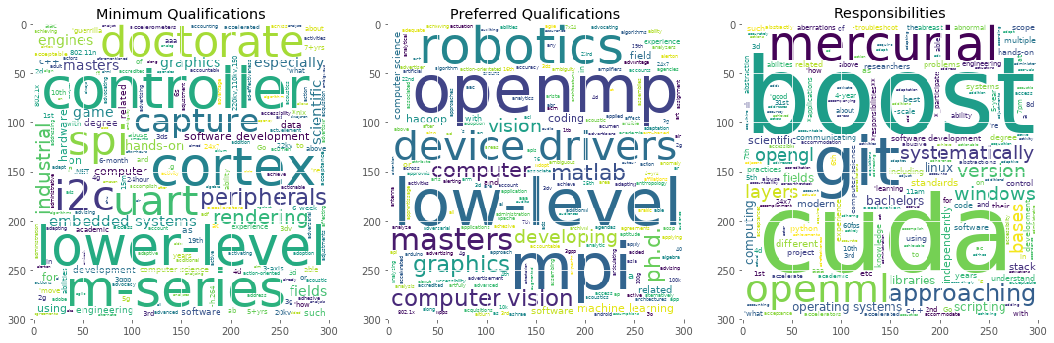

In [83]:
font_path = r'/usr/share/fonts/dejavu/DejaVuSans.ttf'
plt.figure(figsize=(18, 6))

# Minimum Qualification Word Cloud
ax1 = plt.subplot(131)
plt.title('Minimum Qualifications')
plot_tfidf_wordcloud(min_qual_tfidfm, text_index=0, ax=ax1, font_path=font_path, height=300, width=300)

# Preferred Qualification Word Cloud
ax2 = plt.subplot(132)
plt.title('Preferred Qualifications')
plot_tfidf_wordcloud(pref_qual_tfidfm, text_index=0, ax=ax2, font_path=font_path, height=300, width=300)

# Responsibilities Word Cloud
ax3 = plt.subplot(133)
plt.title('Responsibilities')
plot_tfidf_wordcloud(resp_tfidfm, text_index=0, ax=ax3, font_path=font_path, height=300, width=300)

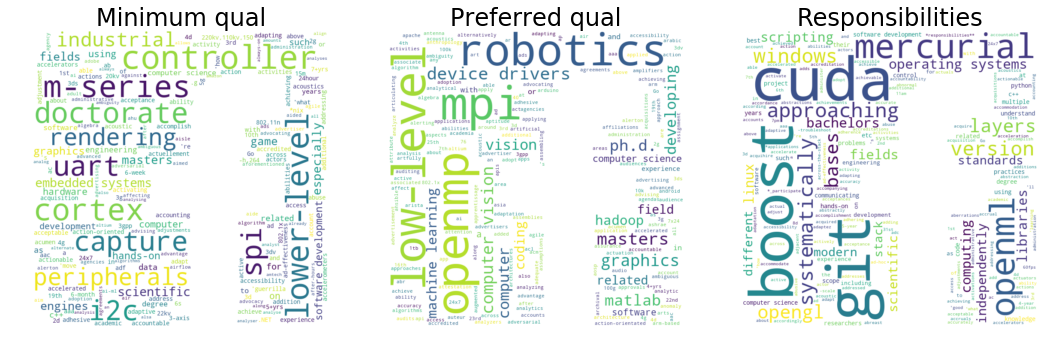

In [82]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
G = np.array(Image.open('wordcloud_masks/fb-icon.png'))

plt.figure(figsize=(18,6))

plt.subplot(131)
tfidf_dict = min_qual_tfidfm.to_dict(orient='records')
wordcloud = WordCloud(mask=G,background_color="white").fit_words(tfidf_dict[0])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Minimum qual',size=24)

plt.subplot(132)
tfidf_dict = pref_qual_tfidfm.to_dict(orient='records')
wordcloud = WordCloud(mask=G,background_color="white").fit_words(tfidf_dict[0])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Preferred qual',size=24)

plt.subplot(133)
tfidf_dict = resp_tfidfm.to_dict(orient='records')
wordcloud = WordCloud(mask=G,background_color="white").fit_words(tfidf_dict[0])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilities',size=24)

plt.savefig('out_graphs/facebook_wordcloud.png', format='png')
plt.show()

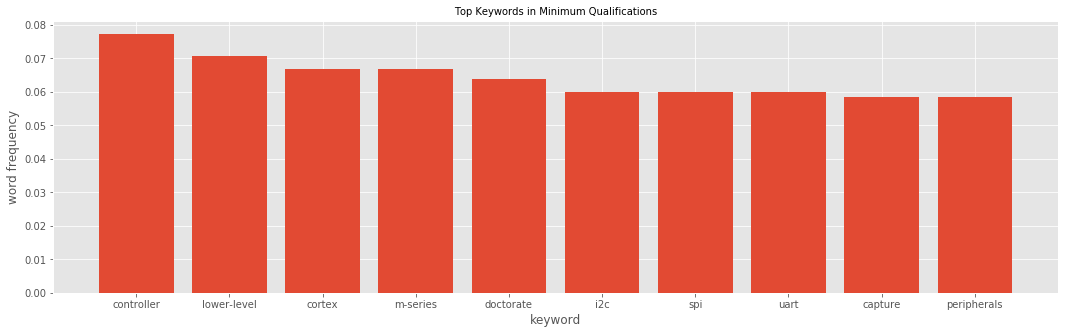

In [53]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Minimum Qualifications'
plot_tfidf_bar(min_qual_tfidfm, text_index=0, ax=ax1, font_path=font_path, bin=10, title=title)

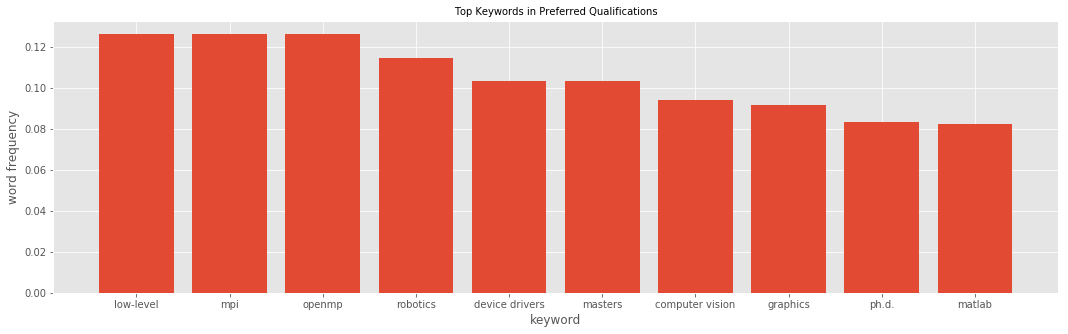

In [54]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Preferred Qualifications'
plot_tfidf_bar(pref_qual_tfidfm, text_index=0, ax=ax1, font_path=font_path, bin=10, title=title)

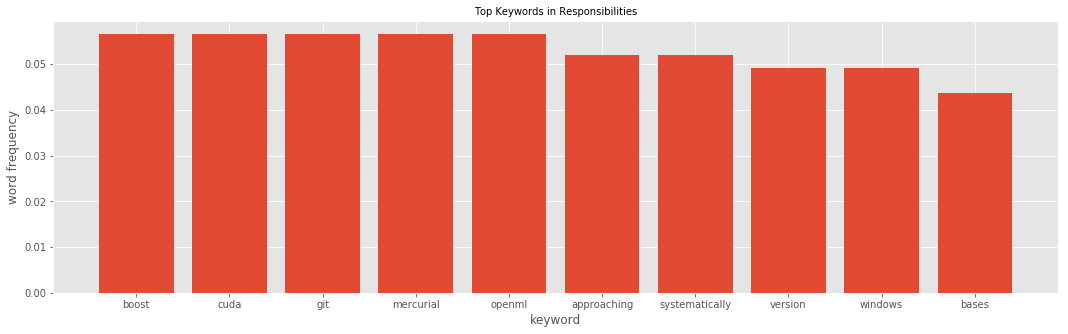

In [55]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xlabel('keyword')
plt.ylabel('word frequency')
title = 'Top Keywords in Responsibilities'
plot_tfidf_bar(resp_tfidfm, text_index=0, ax=ax1, font_path=font_path, bin=10, title=title)

### 6. Relation between keywords in Qualifications and Responsibilities Text

In [68]:
keyword_df = df.copy()

# Replace NaN columns with empty strings.
keyword_df = keyword_df.replace(np.nan, '', regex=True)

# Split job titles by comma into separate columns.
keyword_df['title'] = keyword_df['title'].str.split(' - ', expand=True)[0]

# Combine minimum_qual, preferred_qual and responsibilities into a single column.
keyword_df['text'] = list(keyword_df['minimum_qual'] + keyword_df['preferred_qual'] + keyword_df['responsibilities'])

# Drop unused columns.
keyword_df = keyword_df.drop(['location', 'minimum_qual', 'preferred_qual', 'responsibilities'], axis=1)
keyword_df.head()

,title,text
0,Software Engineer,Masters degree or doctorate in fields related ...
1,Software Engineer,Experience with OS internals and kernel develo...
2,Software Engineer Prototype,Bachelor’s degree in Computer Science or a rel...
3,Software Developer,Experience with analysis of large data setsBS ...
4,"Software Engineer, Facebook Connectivity","Knowledge of C, C++, and Nix systems.\nB.S. or..."


In [69]:
from collections import Counter

def get_keywords(tokens, num, stopwords=[]):
    if len(stopwords) > 0:
        for stopword in stopwords:
            for token in tokens:
                if token == stopword:
                    tokens.remove(token)
    return [t[0] for t in Counter(tokens).most_common(num)]

In [70]:
stopwords = []
with open('stopwords.txt', 'r') as f:
    for line in f:
        if not line.startswith('#'):
            stopwords.append(line.strip())
            
#tokens = tokenize(tokenizer, s, lowercase=True, preserve_case_words=['Go'])
#get_keywords(tokens, 3, stopwords)

In [71]:
# Clean up the text.
tokenizer = nltk.tokenize.MWETokenizer(separator=' ')
import_terms(tokenizer, 'cs_terms.txt')
keyword_df['text'] = keyword_df['text'].apply(lambda s: ' '.join(tokenize(tokenizer, s, lowercase=True, preserve_case_words=['Go', '.NET'])))
keyword_df

# Create keyword columns.
keyword_df['keyword'] = list(','.join(get_keywords(tokenize(tokenizer, col, lowercase=True, preserve_case_words=['Go']), 3, stopwords)) for col in keyword_df['text'])
keyword_df.head(10)

,title,text,keyword
0,Software Engineer,masters degree or doctorate in fields related ...,"hands-on experience,software,engineering"
1,Software Engineer,experience with os internals and kernel for an...,"software,developing,c++"
2,Software Engineer Prototype,bachelor s degree in computer science or a rel...,"c++,systems,python"
3,Software Developer,experience with analysis of large data setsbs ...,"data,software development,analysis"
4,"Software Engineer, Facebook Connectivity",knowledge of c c++ and nix systems b.s or m.s ...,"knowledge,test,development"
5,FRL Tracking Software Engineer,experience with sensor fusion experience with ...,"sensor,3d,robotics"
6,"Software Engineer, Mobile Core Engineering",android os experience virtual reality experien...,"experience,android,os"
7,Software Engineer,experience with and python experience with lab...,"test,knowledge,solutions"
8,User Interaction Platform Software Engineer,probability mathematics and software modeling ...,"software,frameworks,knowledge"
9,"Software Engineer, Source Control",b.s or m.s in computer science or related fiel...,"rust,source,control"


In [72]:
keywords_array=[]
for index, row in keyword_df.iterrows():
    keywords = row['keyword'].split(',')
    for kw in keywords:
        keywords_array.append((kw.strip(' '), row['keyword']))
kw_df = pd.DataFrame(keywords_array).rename(columns={0:'keyword', 1:'keywords'})

In [73]:
kw_df.head(10)

,keyword,keywords
0,hands-on experience,"hands-on experience,software,engineering"
1,software,"hands-on experience,software,engineering"
2,engineering,"hands-on experience,software,engineering"
3,software,"software,developing,c++"
4,developing,"software,developing,c++"
5,c++,"software,developing,c++"
6,c++,"c++,systems,python"
7,systems,"c++,systems,python"
8,python,"c++,systems,python"
9,data,"data,software development,analysis"


In [76]:
document = kw_df.keywords.tolist()
names = kw_df.keyword.tolist()

document_array = []
for item in document:
    items = item.split(',')
    document_array.append((items))

occurrences = OrderedDict((name, OrderedDict((name, 0) for name in names)) for name in names)

# Find the co-occurrences:
for l in document_array:
    for i in range(len(l)):
        for item in l[:i] + l[i + 1:]:
            occurrences[l[i]][item] += 1

co_occur = pd.DataFrame.from_dict(occurrences )

In [77]:
document = kw_df.keywords.tolist()
names = kw_df.keyword.tolist()

document_array = []
for item in document:
    items = item.split(',')
    document_array.append((items))

occurrences = OrderedDict((name, OrderedDict((name, 0) for name in names)) for name in names)

# Find the co-occurrences:
for l in document_array:
    for i in range(len(l)):
        for item in l[:i] + l[i + 1:]:
            occurrences[l[i]][item] += 1

co_occur = pd.DataFrame.from_dict(occurrences)

In [78]:
co_occur.head(10)

,hands-on experience,software,engineering,developing,c++,systems,python,data,software development,analysis,...,payment,nlp.degree,researchers,equivalent experience,regularly,organizations,production,phy,experimental,natural
3d,0,9,0,6,6,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,9,0,0,9,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
abuse,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acoustics,0,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
activities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ads,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
advanced,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agency,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
agreements,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
co_occur.to_csv('keyword_co_occur_facebook.csv')

### Create Keyword Relation Graph using Gelphi

![](https://i.imgur.com/dIG9MtM.png)